# **SMAI Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

## _Problem - 2_

In [125]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [116]:
customer_dataset_path = "../Datasets/SMAI-Dataset-customer-dataset/data.csv"

In [119]:
class GMM:
    def __init__(self, max_iter=100):
        self.k = 3
        self.max_iter = max_iter
        self.centers = None
        self.covs = None
        self.pi = None
        self.log_likelihood = None

    def fit(self, X, k=None):
        if k is not None:
            self.k = k
        n, d = X.shape
        self.centers = X[np.random.choice(n, self.k, replace=False)]

        dataframe = pd.DataFrame(X)
        self.covs = np.array([dataframe.cov().to_numpy()] * self.k)
        
        self.pi = np.array([1 / self.k] * self.k)
        self.log_likelihood = []

        for _ in range(self.max_iter):
            # E-step
            gamma = self._expectation(X)
            # M-step
            self._maximization(X, gamma)
            # Compute log-likelihood
            self.log_likelihood.append(self._compute_log_likelihood(X))
            
            if len(self.log_likelihood) > 1 and np.abs(self.log_likelihood[-1] - self.log_likelihood[-2]) < 1e-6:
                break
        
        print("Centers: ", self.centers)
        print("Covariances: ", self.covs)
        print("Pi: ", self.pi)
        print("Log-likelihood: ", self.log_likelihood[-1])
    
    def _expectation(self, X):
        n, d = X.shape
        gamma = np.zeros((n, self.k))
        for i in range(n):
            for j in range(self.k):
                gamma[i, j] = self.pi[j] * self._gaussian(X[i], self.centers[j], self.covs[j])
            gamma[i] /= np.sum(gamma[i])
        return gamma
    
    def _maximization(self, X, gamma):
        n, d = X.shape
        for j in range(self.k):
            Nj = np.sum(gamma[:, j])
            self.centers[j] = np.sum(np.dot(gamma[:, j], X), axis=0) / Nj
            # self.covs[j] = np.dot(gamma[:, j] * (X - self.centers[j]).T, X - self.centers[j]) / Nj
            self.pi[j] = Nj / n

            cov_sum = np.zeros((d, d))
            for i in range(n):
                diff = (X[i] - self.centers[j]).reshape(-1, 1)  # Column vector
                cov_sum += gamma[i, j] * np.dot(diff, diff.T)
            self.covs[j] = cov_sum / Nj

            # Add a small number to avoid numerical instability
            self.covs[j] += 1e-3 * np.eye(d)
    
    def _compute_log_likelihood(self, X):
        n, d = X.shape
        log_likelihood = 0
        for i in range(n):
            s = 0
            for j in range(self.k):
                s += self.pi[j] * self._gaussian(X[i], self.centers[j], self.covs[j])
            log_likelihood += np.log(s)
        return log_likelihood
    
    def _gaussian(self, x, mean, cov):
        d = x.shape[0]
        # # Step 1: Calculate the Mahalanobis distance
        # diff = x - mean
        # cov_inv = np.linalg.inv(cov)
        # mahalanobis_dist = np.dot(np.dot(diff.T, cov_inv), diff)

        # # Step 2: Calculate the Gaussian probability density
        # exponent = -0.5 * mahalanobis_dist
        # denominator = np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))
        # probability_density = np.exp(exponent) / denominator
        return np.exp(-0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean))) / np.sqrt(np.power(2 * np.pi, d) * np.linalg.det(cov))
    
    def predict(self, X):
        n, d = X.shape
        y = np.zeros(n)
        for i in range(n):
            y[i] = np.argmax([self._gaussian(X[i], self.centers[j], self.covs[j]) for j in range(self.k)])
        return y
    
    def plot_log_likelihood(self):
        plt.plot(self.log_likelihood)
        plt.xlabel('Iteration')
        plt.ylabel('Log-likelihood')
        plt.show()

Centers:  [[122614 122614 122614 122614 122614 122614 122614]
 [104794 104794 104794 104794 104794 104794 104794]
 [123253 123253 123253 123253 123253 123253 123253]]
Covariances:  [[[1.50341764e+10 1.50340719e+10 1.50299625e+10 1.50340340e+10
   4.57458122e+06 1.50340747e+10 1.50341206e+10]
  [1.50340719e+10 1.50339673e+10 1.50298580e+10 1.50339294e+10
   4.57420094e+06 1.50339702e+10 1.50340160e+10]
  [1.50299625e+10 1.50298580e+10 1.50257499e+10 1.50298201e+10
   4.75228257e+06 1.50298609e+10 1.50299067e+10]
  [1.50340340e+10 1.50339294e+10 1.50298201e+10 1.50338916e+10
   4.58201166e+06 1.50339323e+10 1.50339782e+10]
  [4.57458122e+06 4.57420094e+06 4.75228257e+06 4.58201166e+06
   1.71896436e+09 4.59434736e+06 4.58813192e+06]
  [1.50340747e+10 1.50339702e+10 1.50298609e+10 1.50339323e+10
   4.59434736e+06 1.50339730e+10 1.50340189e+10]
  [1.50341206e+10 1.50340160e+10 1.50299067e+10 1.50339782e+10
   4.58813192e+06 1.50340189e+10 1.50340648e+10]]

 [[1.09816370e+10 1.09816776e+10 

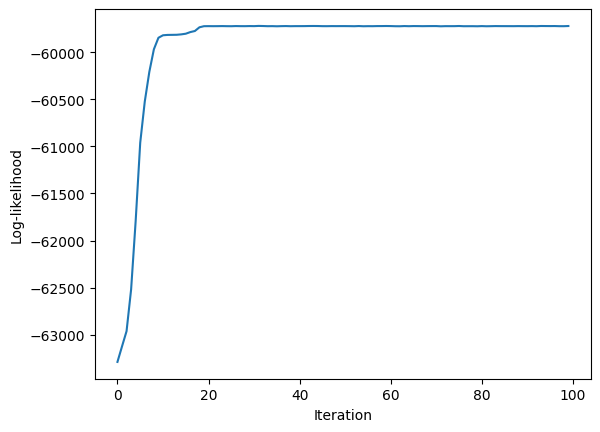

In [121]:
# Load the Data
X = pd.read_csv(customer_dataset_path)
X = X.drop(['Index'], axis=1)
X = X.to_numpy()

# Fit the model
model = GMM()
model.fit(X, k=3)

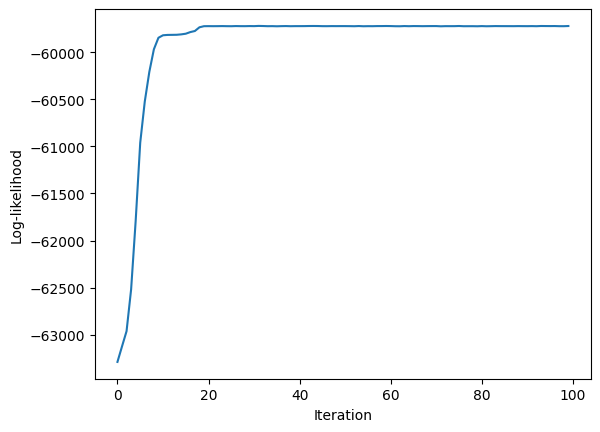

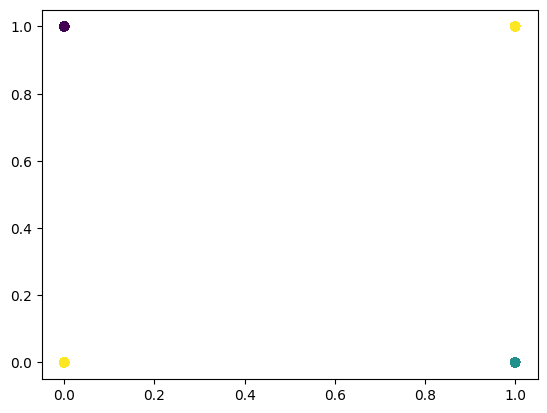

In [123]:
# Plot the log-likelihood
model.plot_log_likelihood()

# # Plot the clusters
y = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
# Vary no of components

> Observations

In [128]:
data = load_wine()
X = data.data

In [129]:
model = GMM()
model.fit(X, k=3)

Centers:  [[1140.63169382 1140.63169382 1140.63169382 1140.63169382 1140.63169382
  1140.63169382 1140.63169382 1140.63169382 1140.63169382 1140.63169382
  1140.63169382 1140.63169382 1140.63169382]
 [ 793.61418873  793.61418873  793.61418873  793.61418873  793.61418873
   793.61418873  793.61418873  793.61418873  793.61418873  793.61418873
   793.61418873  793.61418873  793.61418873]
 [ 825.78847142  825.78847142  825.78847142  825.78847142  825.78847142
   825.78847142  825.78847142  825.78847142  825.78847142  825.78847142
   825.78847142  825.78847142  825.78847142]]
Covariances:  [[[1270570.87626506 1283197.58614197 1282994.0734397  1265300.8828789
   1165279.37813974 1282513.21403642 1282451.0318437  1285353.20995573
   1283586.75417775 1279695.66369113 1284538.97594439 1282305.97349058
    181017.5558757 ]
  [1283197.58614197 1295951.8062243  1295744.97407918 1277878.32388377
   1176851.13767199 1295259.11057941 1295196.32782598 1298127.57178653
   1296343.60679512 1292412.00560